## Abstract: 
Predicting the category of articles using machine learning involves training models on labeled article data, where each article is associated with a specific category. By extracting relevant features from the text, such as keywords or word frequencies, and applying classification algorithms like Naive Bayes, or Logistic Regression, the models learn to predict the category of unseen articles. 

## Objective:
The objective is to develop a machine learning model capable of predicting the category of articles based on their content. By training the model on a labeled dataset containing articles from different categories (e.g., sports, politics, technology, business, entertainment), the model learns patterns in the text data and can then classify unseen articles into their respective categories with high accuracy.


## Challenges:
This task typically requires preprocessing the text data, extracting relevant features, and training a classification algorithm.

## Dataset
The BBC News dataset comprises articles categorized into five distinct categories: business, entertainment, politics, sport, and tech. Each article is labeled with its respective category, allowing for supervised learning tasks like classification

## Import library
Importing Libraries: The code imports necessary libraries for data prepossesing, visualization, natural language processing (NLP), and machine learning.

In [36]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# !pip install wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Demo

## The below code will only run after the notebook is run from start to end

In [37]:
def predict(text):
#     text=text.lower()
#     text = ''.join([char for char in text if char not in string.punctuation])
#     text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
#     text= ' '.join([i for i in text.split() if i.isalpha()])
#     text= ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
#     #print(text)
#     tfid= tf.transform([text])
#     pred=[]
#     pred.append(lr.predict(tfid))
#     #pred.append(svc.predict(tfid))
#     pred.append(nb.predict(tfid))
#     print(pred)

In [38]:
#text=input()

In [39]:
#predict(text)

### Import CSV File
Loading Data: It loads CSV files containing training and test data, as well as a sample solution file.

In [40]:
train = pd.read_csv('BBC News Train.csv')
test = pd.read_csv('BBC News Test.csv')
cat = pd.read_csv('BBC News Sample Solution.csv')

### Checking shape of the data

In [41]:
test.shape, train.shape, cat.shape

((735, 2), (1490, 3), (735, 2))

In [42]:
train.head(1).values

array([[1833,
        'worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy.  prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom  ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper  who now runs her own consulting business  told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a  green light  to the procedures and practices us

In [43]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [44]:
test.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [45]:
cat.head()

,ArticleId,Category
0,1018,sport
1,1319,tech
2,1138,business
3,459,entertainment
4,1020,politics


In [46]:
test['Category'] = cat['Category']

In [47]:
test.shape, train.shape

((735, 3), (1490, 3))

In [48]:
df = pd.concat([train,test])

In [49]:
df.shape

(2225, 3)

In [50]:
df['Category'].value_counts()

Category
sport            493
business         483
politics         421
entertainment    420
tech             408
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='Count'>

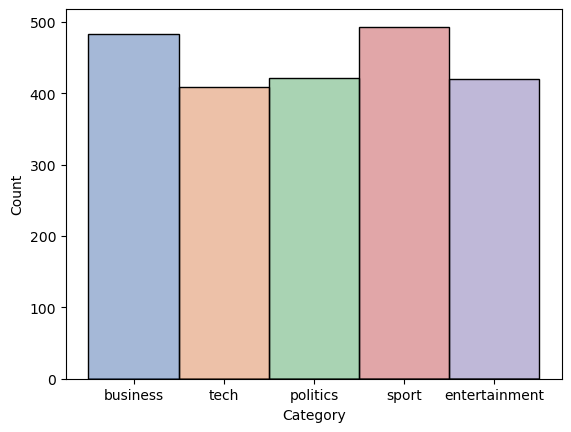

In [51]:
sns.histplot(data = df ,x = 'Category' , hue = 'Category' , palette = 'deep' , legend = False)

## Data Preprocessing:

In [52]:
def clean_text(text):
    
    #Convert the text to lowercase
    text = text.lower()
    
    #Remove punctuation marks from the text
    text = ''.join([char for char in text if char not in string.punctuation])
    
    #Remove stopwords from the text
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

# Additional steps like stemming or lemmatization

#### The above code will clean the input text by converting into lowercase, removing punctuation, and eliminating stopwords. It's commonly used as a preprocessing step in natural language processing tasks like text classification or sentiment analysis.

In [53]:
df['Text']=df['Text'].apply(clean_text)

In [54]:
df['Text']=df['Text'].apply(lambda x : ' '.join([i for i in x.split() if i.isalpha()]))

#### So, overall, this line of code removes non-alphabetic characters (such as punctuation : A5bn8) from each text string in the 'Text' column of the DataFrame df.

In [55]:
from nltk.tokenize import word_tokenize

## This code generates a word cloud visualization from the text data in the 'Text' column 

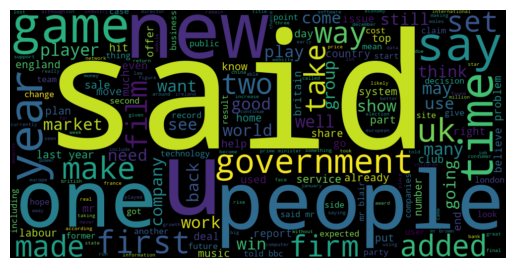

In [56]:
words = []
for message in df['Text']:
    words.extend([word for word in message.split() if word not in STOPWORDS])
        
wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Distribution of Categories using Bar plot and Pie-Chart

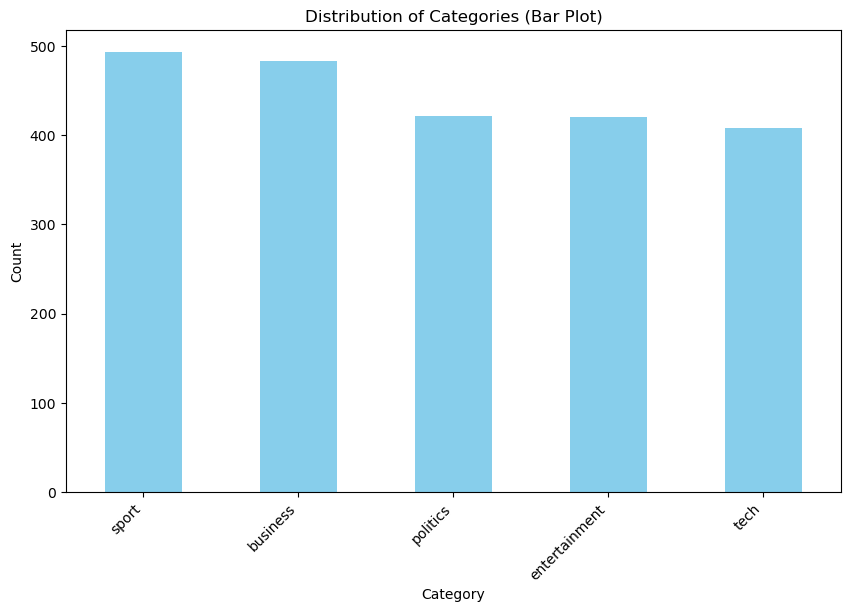

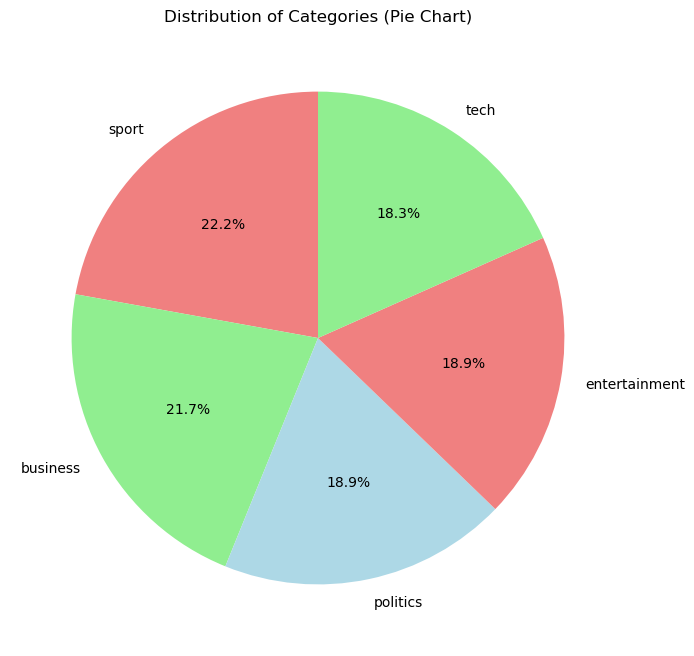

In [57]:
# Assuming 'Category' is the column containing categories
category_distribution = df['Category'].value_counts()

# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories (Bar Plot)')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Alternatively, you can use a pie chart
plt.figure(figsize=(8, 8))
category_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribution of Categories (Pie Chart)')
plt.ylabel('')  # Remove the default 'count' label on the y-axis
plt.show()

In [58]:
train.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


# Word lemmatization

#In conclusion, Lemmatization is a technique in natural language processing (NLP) that simplifies words to their root meaning word.This process helps improve the efficiency and accuracy of text analysis by reducing words to their core meaning, making it easier for algorithms to understand and process language data.

In [59]:
lemmatizer= WordNetLemmatizer()

In [60]:
df['Text'] = df['Text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

## Specifying Independent variables and Dependent Variables

In [61]:
X=df.drop(columns=['Category','ArticleId'],axis=1)
y=df['Category']

#### It splits the data into training and testing sets.

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
X_train.shape,y_train.shape

((1780, 1), (1780,))

### TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency)
It uses TF-IDF vectorization to convert text data into numerical feature vectors

In [64]:
X_train['Text']

0       qpr keeper day head preston queen park ranger ...
511     seaman sail biometric future luxury cruise lin...
82      russian film win bbc world prize russian drama...
350     savvy searcher fail spot ad internet search en...
610     u trade deficit widens sharply gap u export im...
                              ...                        
148     famed music director viotti dy conductor marce...
1095    goldsmith denies war advice claim attorney gen...
1130    blair said would stand tony blair promised gor...
1294    u trade gap hit record gap u export import hit...
860     tory pledge free sport lesson child would offe...
Name: Text, Length: 1780, dtype: object

In [65]:
tf = TfidfVectorizer()

In [66]:
tf.fit(X_train['Text'])

TfidfVectorizer()

In [67]:
tfidf_train = tf.transform(X_train['Text'])
tfidf_test = tf.transform(X_test['Text'])

### The TF-IDF Vectorizer is a popular tool used in natural language processing for converting a collection of text documents into numerical feature vectors

## Model Building
It builds machine learning models (Logistic Regression and Naive Bayes) and evaluates their performance using accuracy, precision, recall, F1-score, classification report, and confusion matrix.

#### Model Building on logistic Regression 

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [69]:
lr = LogisticRegression()
lr.fit(tfidf_train,y_train)
y_pred = lr.predict(tfidf_test)

print("Logistc Regression")

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Logistc Regression
Accuracy: 0.7393258426966293
Precision: 0.7405255958128698
Recall: 0.7393258426966293
F1 Score: 0.7392422143488152
Classification Report:
                precision    recall  f1-score   support

     business       0.72      0.74      0.73        92
entertainment       0.74      0.71      0.72        82
     politics       0.77      0.75      0.76        83
        sport       0.71      0.78      0.75       101
         tech       0.77      0.71      0.74        87

     accuracy                           0.74       445
    macro avg       0.74      0.74      0.74       445
 weighted avg       0.74      0.74      0.74       445

Confusion Matrix:
 [[68  4  4 10  6]
 [ 8 58  3  9  4]
 [ 3  7 62  7  4]
 [ 9  4  4 79  5]
 [ 6  5  8  6 62]]


#### Model Building on naive_bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tfidf_train.toarray(),y_train)
y_pred = nb.predict(tfidf_test.toarray())
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# print("* Matrix:\n", conf_matrix)


Accuracy: 0.7325842696629213
Precision: 0.7333696443921646
Recall: 0.7325842696629213
F1 Score: 0.7320352717104881
Classification Report:
                precision    recall  f1-score   support

     business       0.74      0.74      0.74        92
entertainment       0.74      0.67      0.71        82
     politics       0.73      0.75      0.74        83
        sport       0.71      0.79      0.75       101
         tech       0.74      0.70      0.72        87

     accuracy                           0.73       445
    macro avg       0.73      0.73      0.73       445
 weighted avg       0.73      0.73      0.73       445



### on above codes, Compare the accuracy scores to determine which algorithm performs better. Analyze the confusion matrices to understand how each model performs in terms of true positives, true negatives, false positives, and false negatives.

## It performs hyperparameter tuning for Logistic Regression and Naive Bayes models using Randomized Search CV.Random search for hyperparameter tuning is often used because it efficiently explores the hyperparameter space by randomly selecting combinations, which can help in finding good configurations faster compared to exhaustive search methods

## Hyperparameter Tunining of Logistic Regression

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
    'C': uniform(0.1, 10),     # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Initialize Random Search CV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)

# Fit Random Search CV to the data
random_search.fit(tfidf_train, y_train)  # Replace X_train and y_train with your training data

# Print best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bhavi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters: {'C': 0.6808361216819946, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7005617977528089


## Hyperparameter Tuining of Naive Bayes

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform, randint

# Define hyperparameter grid
param_grid = {
    'alpha': uniform(0.1, 2),  # Additive (Laplace/Lidstone) smoothing parameter
    'fit_prior': [True, False]  # Whether to learn class prior probabilities or not
}

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Initialize Randomized Search CV
random_search = RandomizedSearchCV(naive_bayes, param_distributions=param_grid, n_iter=100, cv=5, random_state=42)

# Fit Randomized Search CV to the data
random_search.fit(tfidf_train, y_train)  # Replace tfidf_train and y_train with your training data

# Print best hyperparameters and best score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Hyperparameters: {'alpha': 0.6078308278686894, 'fit_prior': False}
Best Score: 0.7089887640449438


## Conclusion:
The project demonstrates effective text classification through comprehensive data preprocessing, including lowercase conversion, punctuation removal, and stop words elimination. It employs both Logistic Regression and Naive Bayes models, comparing their performances using metrics such as accuracy, precision, and recall. Hyperparameter tuning further optimizes model performance, underscoring the importance of experimentation. Overall, the project provides a robust framework for text analysis tasks, showcasing the significance of preprocessing techniques and model selection in achieving accurate classification results.


## We can deploy this model, but its accuracy is currently low due to being trained on a limited dataset. To improve accuracy and achieve better variance in the data, we require a larger and more diverse dataset. By incorporating more data, we can enhance the model's predictive performance and provide more reliable categorization for news articles.